In [ ]:
!pip install mpld3

In [1]:
import pandas as pd
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
header_list = ["tweetid","userid","user_display_name","user_screen_name","user_reported_location","user_profile_description","user_profile_url","follower_count","following_count","account_creation_date","account_language","tweet_language","tweet_text","tweet_time","tweet_client_name","in_reply_to_tweetid","in_reply_to_userid","quoted_tweet_tweetid","is_retweet","retweet_userid","retweet_tweetid","latitude","longitude","quote_count","reply_count","like_count","retweet_count","hashtags","urls","user_mentions","poll_choices"]
header_dict = {val:i for i,val in enumerate(header_list)}

In [3]:
import sys

def parse(f,chunksize = 100000, cols = None, test_bool = False, dtype = None):
    lines = 9041*1000
    for i,gm_chunk in enumerate(pd.read_csv("csv/ira_tweets_csv_hashed.csv",chunksize = chunksize, usecols = cols, dtype = dtype)):
        f(gm_chunk)
        if test_bool:
            print('Done')
            break
        j = i*chunksize/lines
        sys.stdout.write('\r')
        # the exact output you're looking for:
        bar_int = int(j*20)
        sys.stdout.write("[%-20s] %d%%" % ('='*bar_int, int(j*100 + 1)))
        sys.stdout.flush()


In [4]:
cols = [header_dict['tweet_time']]

global tweet_time_list
tweet_time_list = list()
def f(chunk):
    global tweet_time_list
    for time in chunk['tweet_time']:
        time = datetime.datetime.strptime(time.split(' ')[0], '%Y-%m-%d')
#         time = time.split(' ')[0]
        tweet_time_list.append(time)

parse(f, 10000,cols = cols, test_bool = False)    

[=================== ] 100%

In [5]:
tweet_time_list.sort()
firstday = tweet_time_list[0]
relativeday = [(date - firstday).days for date in tweet_time_list]
max(relativeday)

3330

In [12]:
from collections import Counter
tweet_time_list.sort()
tweet_time_group_dict = dict(Counter(tweet_time_list))
tweet_time_group_dict

{datetime.datetime(2009, 5, 9, 0, 0): 4,
 datetime.datetime(2009, 5, 12, 0, 0): 3,
 datetime.datetime(2009, 5, 15, 0, 0): 2,
 datetime.datetime(2009, 5, 16, 0, 0): 2,
 datetime.datetime(2009, 5, 17, 0, 0): 1,
 datetime.datetime(2009, 5, 20, 0, 0): 4,
 datetime.datetime(2009, 5, 21, 0, 0): 1,
 datetime.datetime(2009, 5, 22, 0, 0): 1,
 datetime.datetime(2009, 5, 25, 0, 0): 1,
 datetime.datetime(2009, 5, 31, 0, 0): 1,
 datetime.datetime(2009, 6, 1, 0, 0): 1,
 datetime.datetime(2009, 6, 3, 0, 0): 1,
 datetime.datetime(2009, 6, 10, 0, 0): 1,
 datetime.datetime(2009, 6, 14, 0, 0): 1,
 datetime.datetime(2009, 6, 19, 0, 0): 1,
 datetime.datetime(2009, 6, 23, 0, 0): 1,
 datetime.datetime(2009, 7, 1, 0, 0): 1,
 datetime.datetime(2009, 7, 3, 0, 0): 1,
 datetime.datetime(2009, 7, 5, 0, 0): 1,
 datetime.datetime(2009, 7, 8, 0, 0): 3,
 datetime.datetime(2009, 7, 16, 0, 0): 1,
 datetime.datetime(2009, 7, 30, 0, 0): 1,
 datetime.datetime(2009, 9, 9, 0, 0): 3,
 datetime.datetime(2009, 9, 10, 0, 0): 5,


In [13]:
new_df = pd.DataFrame.from_dict(tweet_time_group_dict, orient='index', columns=['count'])
new_df['count'].max()

57646

<IPython.core.display.Javascript object>


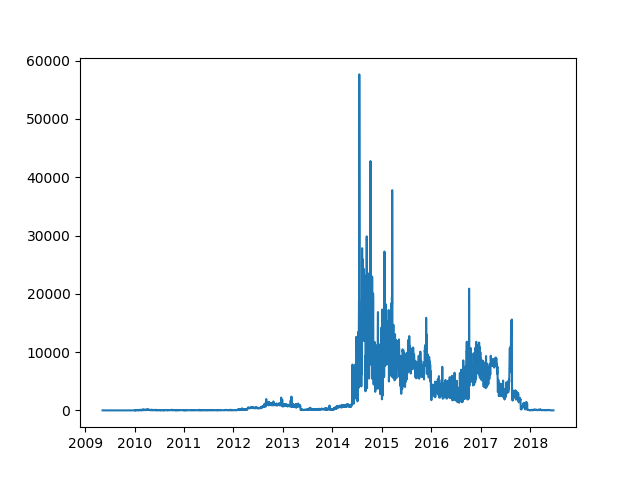

In [15]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()
%matplotlib notebook

# new_df.plot(kind="bar")
lists = sorted(tweet_time_group_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.savefig("twitter_activity_by_day.png", dpi=3000)
plt.show()